In [2]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pit
from pygments import highlight
from scipy.stats import entropy

In [3]:
df = pd.read_csv("fifa_players.csv")
#df.shape
df

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,Rory McKenzie,10/7/1993,25,175.26,74.8,"RM,CAM,CM",Scotland,67,70,...,54,69,41,60,64,63,56,40,20,18
17950,M. Sipľak,Michal Sipľak,2/2/1996,23,182.88,79.8,LB,Slovakia,59,67,...,22,62,55,42,39,32,52,53,64,60
17951,J. Bekkema,Jan Bekkema,4/9/1996,22,185.42,89.8,GK,Netherlands,59,67,...,9,27,10,5,25,16,47,9,12,13
17952,A. Al Yami,Abdulrahman Al Yami,6/19/1997,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,...,58,38,15,54,52,50,53,16,18,17


In [4]:
df["full_name"].str.strip()

0          Lionel Andrés Messi Cuccittini
1            Christian  Dannemann Eriksen
2                              Paul Pogba
3                         Lorenzo Insigne
4                       Kalidou Koulibaly
                       ...               
17949                      Rory  McKenzie
17950                       Michal Sipľak
17951                         Jan Bekkema
17952                 Abdulrahman Al Yami
17953    José Francisco dos Santos Júnior
Name: full_name, Length: 17954, dtype: object

In [5]:
#std_age = df["age"].std()
std_overall = df["overall_rating"].std()
#std_age
std_overall

np.float64(6.9637297873224355)

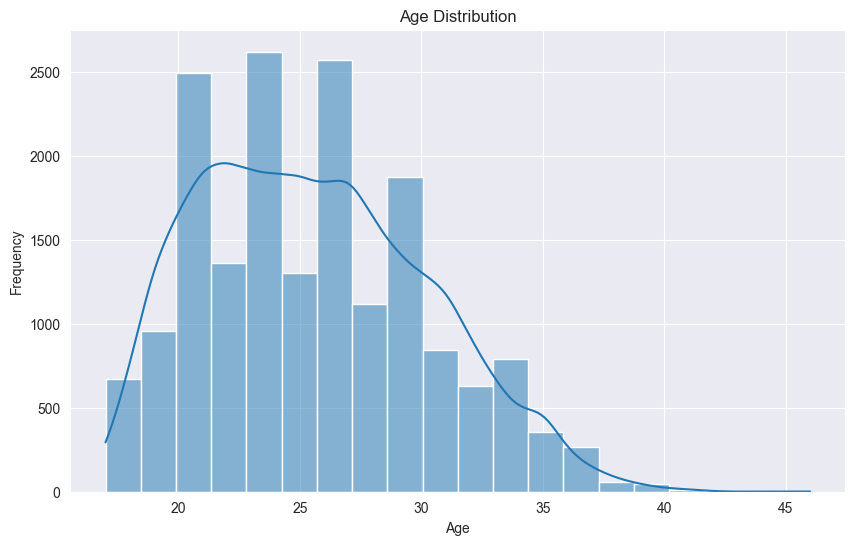

In [6]:
pit.figure(figsize = (10,6))
sns.histplot(df["age"], bins=20, kde=True)
pit.title("Age Distribution")
pit.xlabel("Age")
pit.ylabel("Frequency")
pit.show()

In [7]:
correlation = df[['age', 'overall_rating']].corr()
correlation



,age,overall_rating
age,1.000000,0.461529
overall_rating,0.461529,1.000000


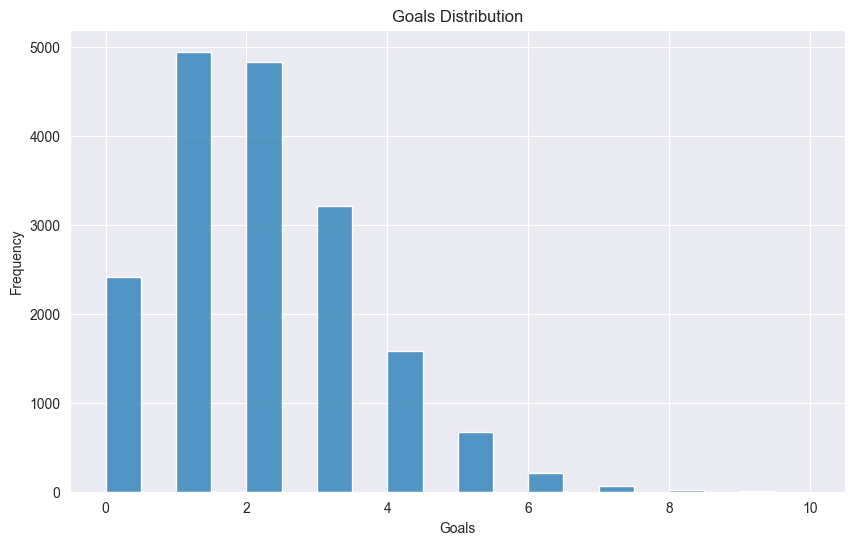

In [8]:
if 'goals' not in df.columns:
    df['goals'] = np.random.poisson(lam = 2, size = len(df))

    pit.figure(figsize = (10,6))
    sns.histplot(df["goals"], bins=20, kde=False)
    pit.title("Goals Distribution")
    pit.xlabel("Goals")
    pit.ylabel("Frequency")
    pit.show()


In [9]:
mean_age = df["age"].mean()
median_age = df["age"].median()

mean_overall = df["overall_rating"].mean()
median_overall = df["overall_rating"].median()

#mean_age
#median_age
#mean_overall
#median_overall

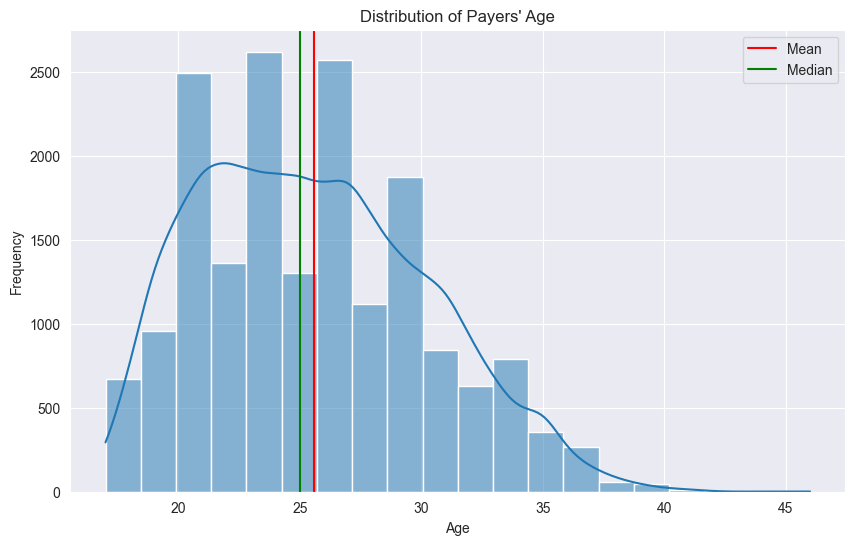

In [10]:
pit.figure(figsize = (10,6))
sns.histplot(df["age"], bins=20, kde=True)
pit.title("Distribution of Payers\' Age")
pit.xlabel("Age")
pit.ylabel("Frequency")
pit.axvline(mean_age, color='red', label='Mean')
pit.axvline(median_age, color='green', label='Median')
pit.legend()
pit.show()

In [11]:
def gini(array):
    array = array.flatten().astype(float)
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 0.0000001
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]

    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))

gini_index = gini(df['overall_rating'].values)
gini_index

np.float64(0.059080790935207926)

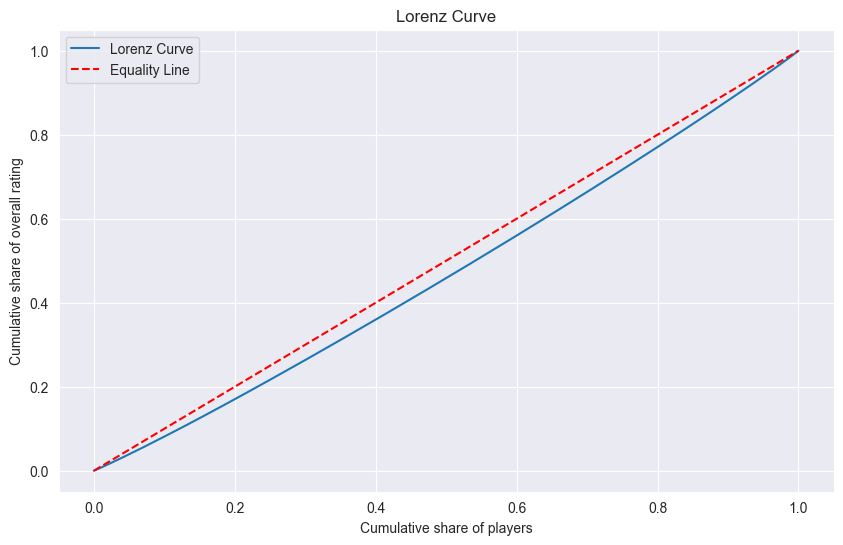

In [12]:
def lorenz_curve(array):
    array = array.flatten().astype(float)
    array = np.sort(array)
    array_cumsum = np.cumsum(array)
    lorenz_curve = array_cumsum / array_cumsum[-1]
    lorenz_curve = np.insert(lorenz_curve, 0, 0)
    return lorenz_curve


lorenz = lorenz_curve(df['overall_rating'].values)


pit.figure(figsize=(10, 6))
pit.plot(np.linspace(0.0, 1.0, lorenz.size), lorenz, label='Lorenz Curve')
pit.plot([0, 1], [0, 1], linestyle='--', color='r', label='Equality Line')
pit.title('Lorenz Curve')
pit.xlabel('Cumulative share of players')
pit.ylabel('Cumulative share of overall rating')
pit.legend()
pit.show()

In [13]:
def calculate_entropy(column):
    values_counts = column.value_counts()
    probabilities = values_counts / len(column)
    return entropy(probabilities)

overall_rating_entropy = calculate_entropy(df['overall_rating'])
overall_rating_entropy


np.float64(3.351809661598563)

In [14]:
def information_gain(df,overall_rating_col, target_col):
    overall_rating_entropy = calculate_entropy(df[overall_rating_col])
    target_entropy = calculate_entropy(df[target_col])

    joint_entropy = calculate_entropy(df[[overall_rating_col, target_col]])

    return overall_rating_entropy - joint_entropy

gain = information_gain(df, 'overall_rating', 'value_euro')
gain

np.float64(-3.1717363707311623)

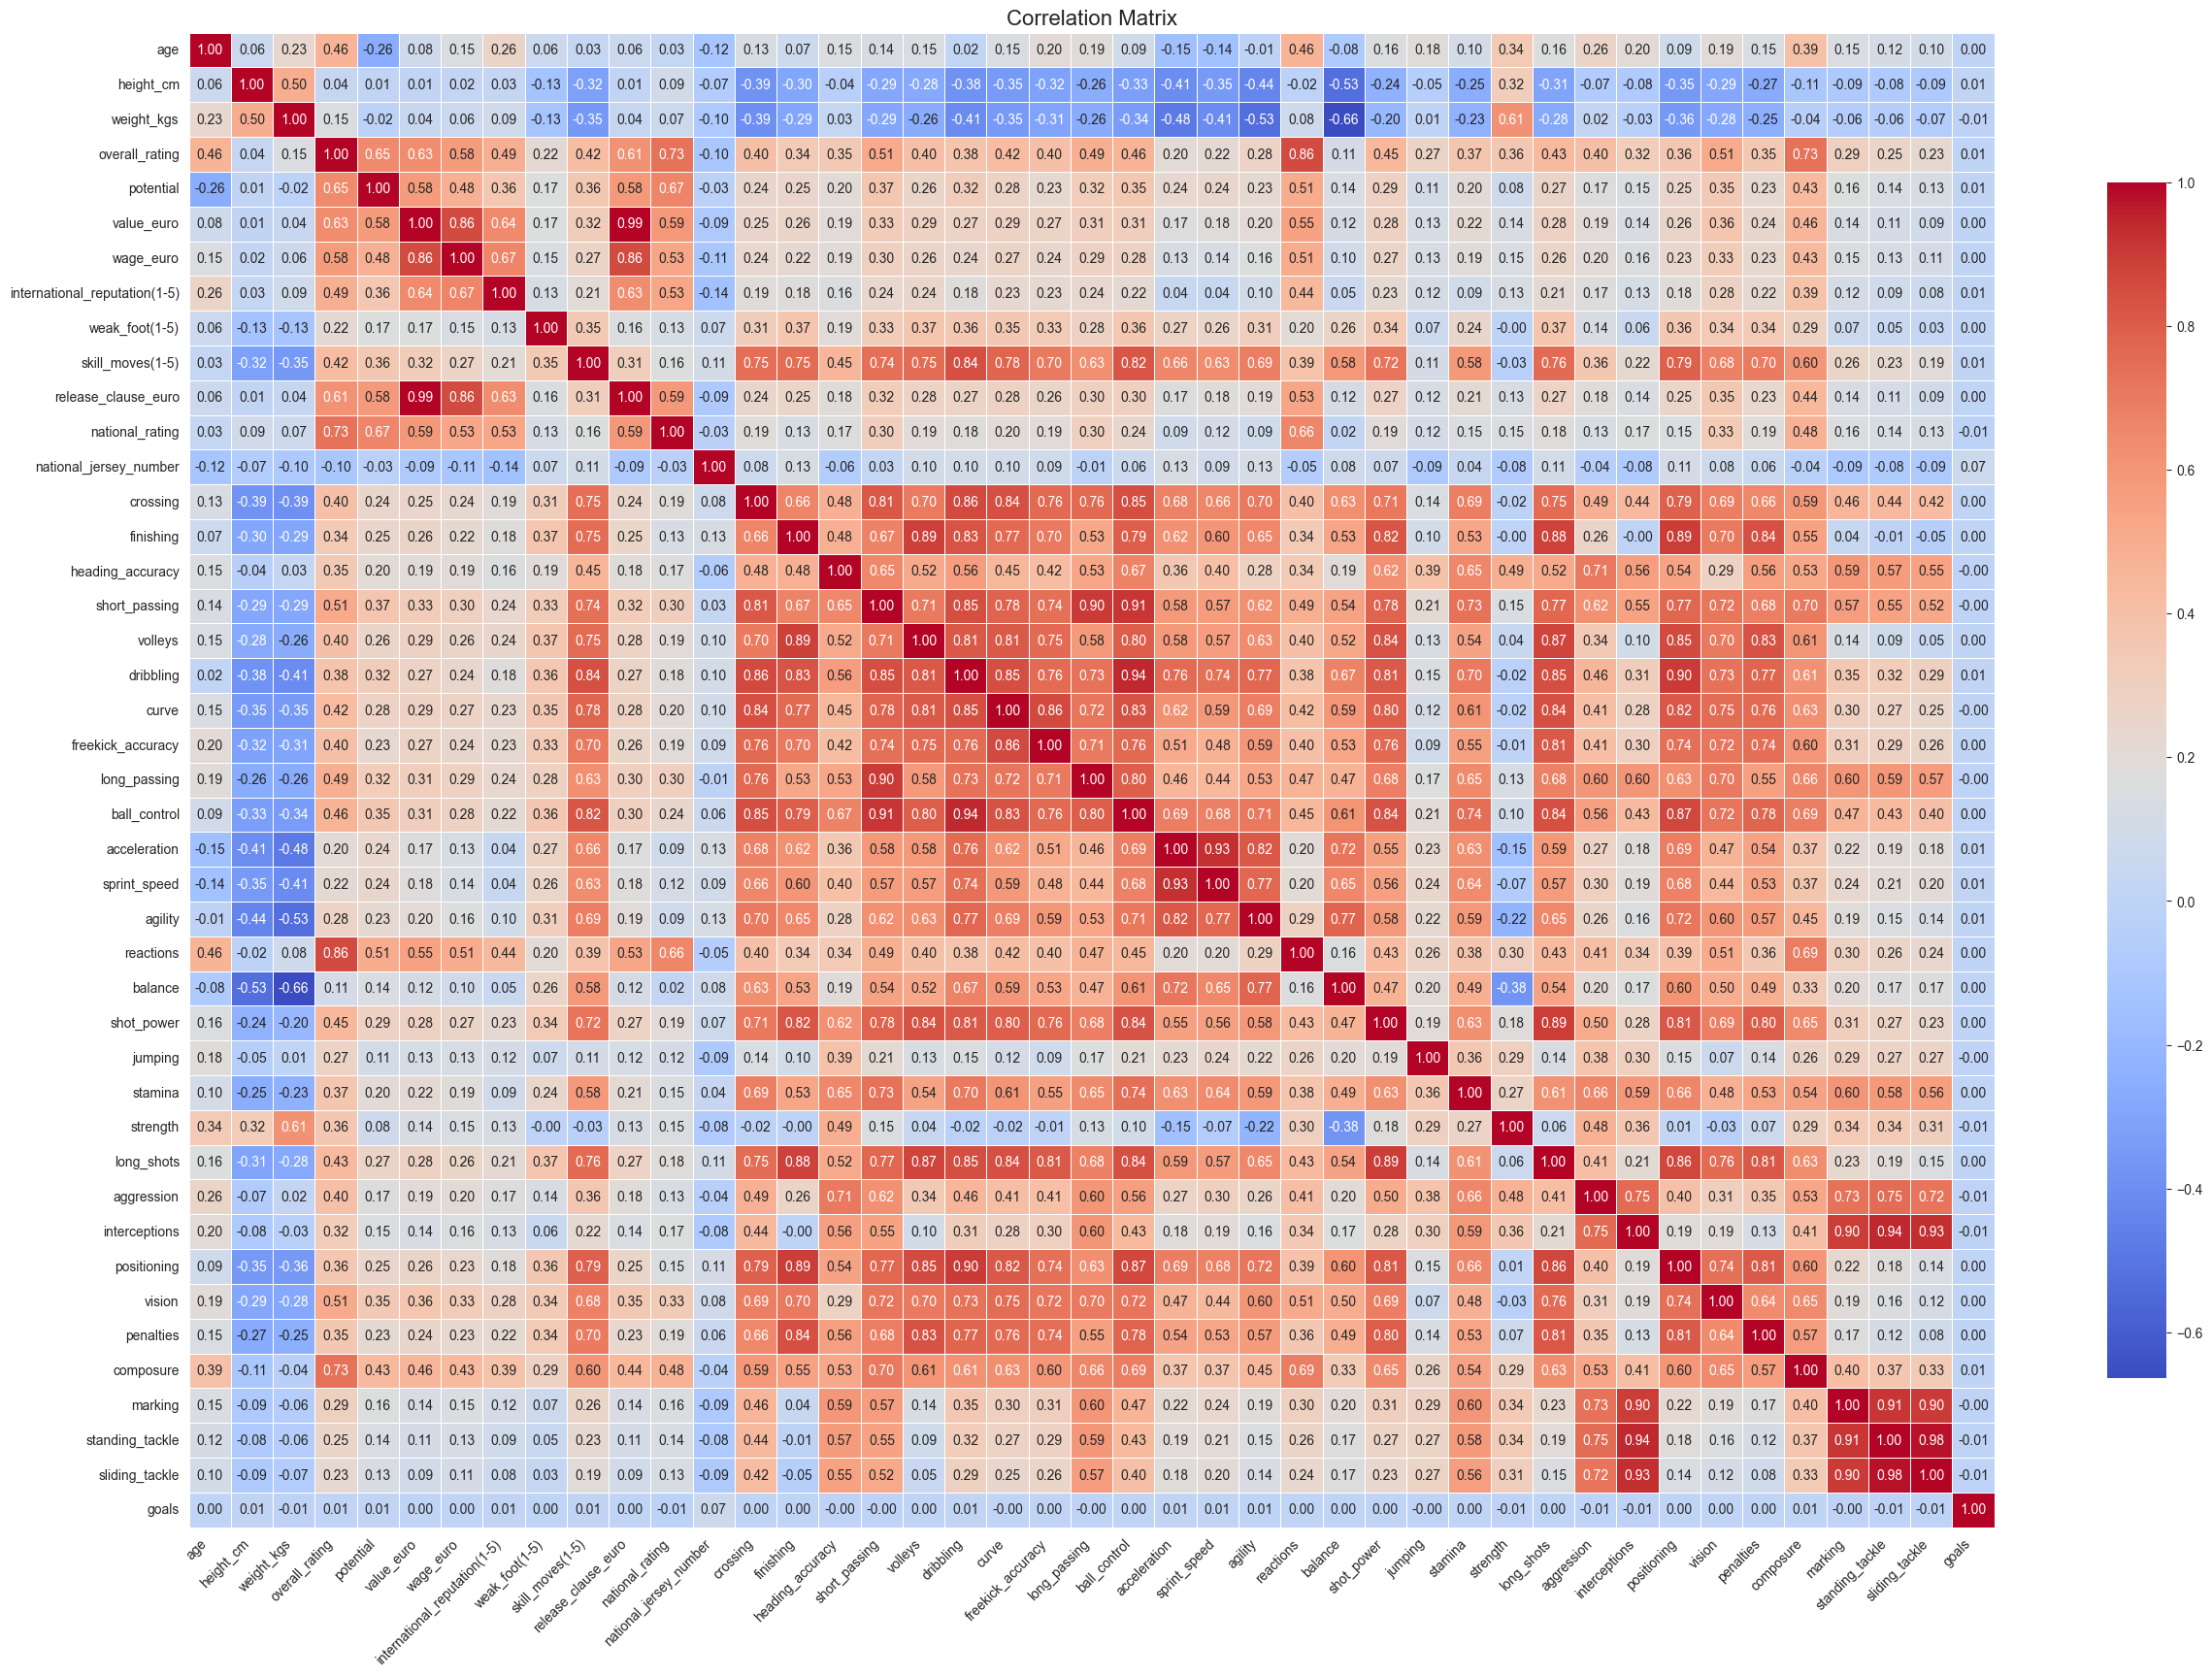

In [15]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Plot heatmap with improved formatting
pit.figure(figsize=(30, 20))  # Adjust figure size
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",  # Format values to 2 decimal places
    cmap='coolwarm',  # Use a diverging color palette
    cbar_kws={'shrink': 0.8},  # Adjust color bar size
    linewidths=0.5  # Add space between cells
)
pit.title('Correlation Matrix', fontsize=16)  # Add a title with larger font size
pit.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
pit.yticks(rotation=0)  # Keep y-axis labels horizontal
pit.show()

In [16]:
key_attributes = {
    'pace': ['sprint_speed', 'acceleration'],
    'passing': ['short_passing', 'long_passing', 'vision', 'crossing', 'curve', 'freekick_accuracy'],
    'shooting': ['finishing', 'shot_power', 'long_shots', 'penalties', 'volleys', 'positioning'],
    'physicality': ['strength', 'stamina', 'jumping', 'aggression'],
    'dribling': ['dribbling', 'ball_control', 'agility', 'balance', 'reactions', 'composure'],
    'defending': ['marking', 'standing_tackle', 'sliding_tackle', 'interceptions', 'heading_accuracy']
}

# Completare valori lipsă și calcul atribute cheie
for key, related_attrs in key_attributes.items():
    for attr in related_attrs:
        if attr in df.columns:
            df[attr] = df[attr].fillna(0)  # Înlocuiește NaN cu 0
        else:
            print(f"Warning: Attribute '{attr}' is missing from the dataset.")

# Calculul mediei pentru fiecare atribut cheie
for key, related_attrs in key_attributes.items():
    if all(attr in df.columns for attr in related_attrs):
        df[key] = df[related_attrs].mean(axis=1).round().astype(int)

In [17]:
# Define key attributes
key_attributes = {
    'pace': ['sprint_speed', 'acceleration'],
    'passing': ['short_passing', 'long_passing', 'vision', 'crossing', 'curve', 'freekick_accuracy'],
    'shooting': ['finishing', 'shot_power', 'long_shots', 'penalties', 'volleys', 'positioning'],
    'physicality': ['strength', 'stamina', 'jumping', 'aggression'],
    'dribling': ['dribbling', 'ball_control', 'agility', 'balance', 'reactions', 'composure'],
    'defending': ['marking', 'standing_tackle', 'sliding_tackle', 'interceptions', 'heading_accuracy']
}

# Fill NaN for existing attributes and compute key attributes
created_columns = []
for key, related_attrs in key_attributes.items():
    # Check which attributes exist
    valid_attrs = [attr for attr in related_attrs if attr in df.columns]
    if valid_attrs:
        # Fill NaN with 0 for valid attributes
        for attr in valid_attrs:
            df[attr] = df[attr].fillna(0)
        # Compute mean for the key attribute
        df[key] = df[valid_attrs].mean(axis=1).round().astype(int)
        created_columns.append(key)
    else:
        print(f"Warning: Could not compute '{key}' because none of its attributes exist.")

# Check which key attributes were created
print("Created key attributes:", created_columns)

# If no key attributes were created, fall back to numeric columns
if not created_columns:
    print("No key attributes created. Falling back to numeric columns.")
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    # Exclude target and irrelevant columns
    exclude_cols = ['overall_rating', 'value_euro', 'goals']  # Adjust as needed
    features = [col for col in numeric_columns if col not in exclude_cols]
else:
    features = created_columns + ['age']  # Include 'age' as in your original plan

# Ensure features exist
missing_features = [f for f in features if f not in df.columns]
if missing_features:
    print(f"Error: Features {missing_features} not in DataFrame.")
else:
    print("Selected features:", features)

Created key attributes: ['pace', 'passing', 'shooting', 'physicality', 'dribling', 'defending']
Selected features: ['pace', 'passing', 'shooting', 'physicality', 'dribling', 'defending', 'age']


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Select features and target
X = df[features].fillna(0)  # Handle any remaining NaN
y = df['overall_rating'].fillna(df['overall_rating'].mean())  # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    X_train_data = X_train_scaled if name == "Linear Regression" else X_train
    X_test_data = X_test_scaled if name == "Linear Regression" else X_test
    model.fit(X_train_data, y_train)
    y_pred = model.predict(X_test_data)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}
    print(f"{name} - MSE: {mse:.2f}, R²: {r2:.2f}")

Linear Regression - MSE: 24.36, R²: 0.50
Random Forest - MSE: 5.93, R²: 0.88
Gradient Boosting - MSE: 6.87, R²: 0.86


In [19]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate
for name, model in models.items():
    # Use scaled data for Linear Regression, unscaled for tree-based models
    X_train_data = X_train_scaled if name == "Linear Regression" else X_train
    X_test_data = X_test_scaled if name == "Linear Regression" else X_test

    model.fit(X_train_data, y_train)
    y_pred = model.predict(X_test_data)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}
    print(f"{name} - MSE: {mse:.2f}, R²: {r2:.2f}")

Linear Regression - MSE: 24.36, R²: 0.50
Random Forest - MSE: 5.93, R²: 0.88
Gradient Boosting - MSE: 6.87, R²: 0.86


In [20]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grids = {
    "Linear Regression": {},  # No hyperparameters to tune
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# Store best models
best_models = {}

# Perform GridSearchCV
for name, model in models.items():
    if param_grids[name]:  # Only run GridSearch if there are parameters to tune
        grid_search = GridSearchCV(
            model,
            param_grids[name],
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
        X_train_data = X_train_scaled if name == "Linear Regression" else X_train
        grid_search.fit(X_train_data, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"{name} Best Params: {grid_search.best_params_}")
    else:
        best_models[name] = model  # Use the original model if no tuning

Random Forest Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Gradient Boosting Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


Tuned Linear Regression - MSE: 24.36, R²: 0.50
Tuned Random Forest - MSE: 5.88, R²: 0.88
Tuned Gradient Boosting - MSE: 5.77, R²: 0.88


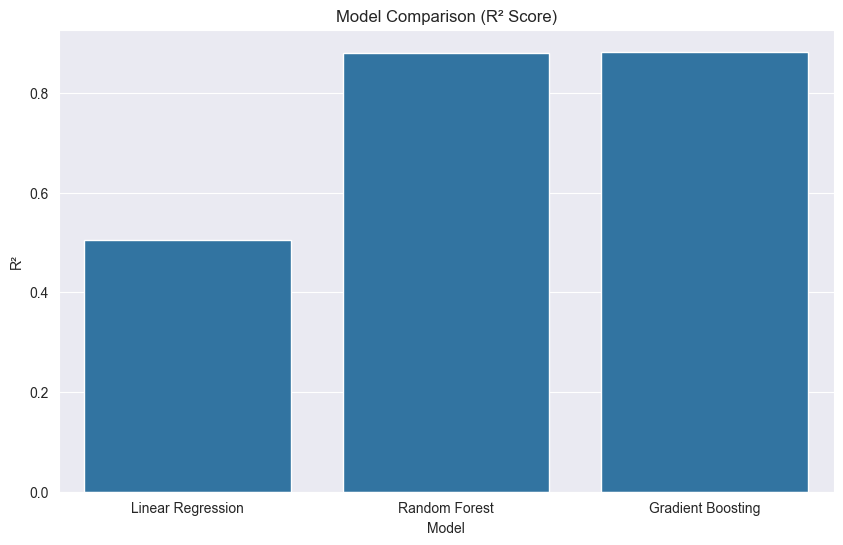

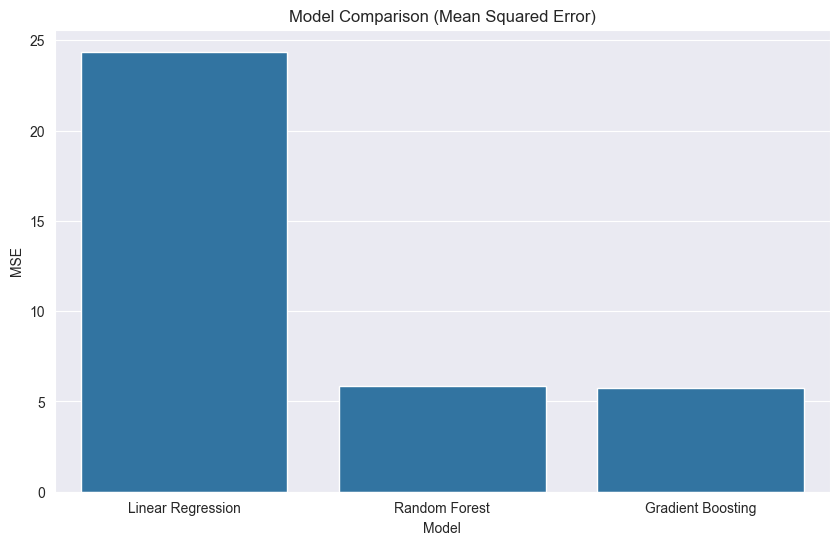

In [21]:
# Evaluate tuned models
final_results = []
for name, model in best_models.items():
    X_test_data = X_test_scaled if name == "Linear Regression" else X_test
    y_pred = model.predict(X_test_data)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    final_results.append({"Model": name, "MSE": mse, "R²": r2})
    print(f"Tuned {name} - MSE: {mse:.2f}, R²: {r2:.2f}")

# Create a DataFrame for comparison
results_df = pd.DataFrame(final_results)

# Plot comparison
pit.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R²", data=results_df)
pit.title("Model Comparison (R² Score)")
pit.show()

pit.figure(figsize=(10, 6))
sns.barplot(x="Model", y="MSE", data=results_df)
pit.title("Model Comparison (Mean Squared Error)")
pit.show()

In [22]:
from sklearn.model_selection import cross_val_score

for name, model in best_models.items():
    X_train_data = X_train_scaled if name == "Linear Regression" else X_train
    cv_scores = cross_val_score(model, X_train_data, y_train, cv=5, scoring='r2')
    print(f"{name} CV R²: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Linear Regression CV R²: 0.49 ± 0.01
Random Forest CV R²: 0.89 ± 0.00
Gradient Boosting CV R²: 0.89 ± 0.00


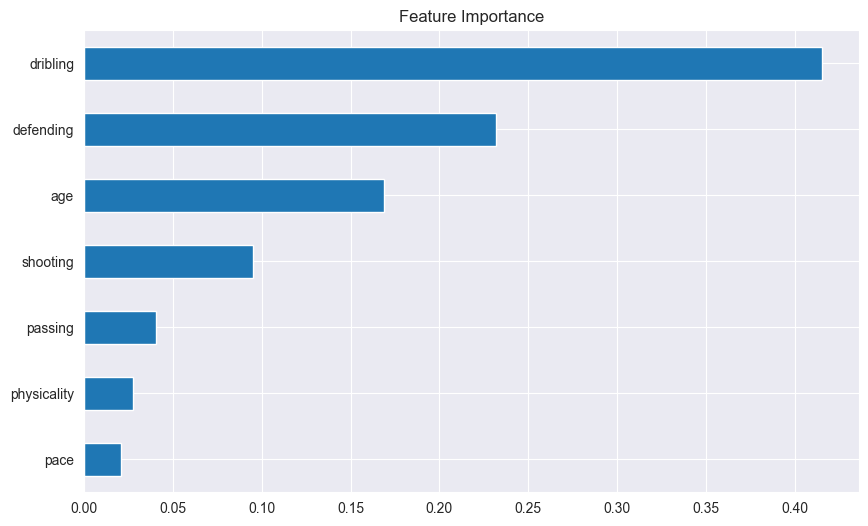

In [23]:
best_model = best_models["Random Forest"]  # Example
importances = pd.Series(best_model.feature_importances_, index=features)
pit.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh')
pit.title("Feature Importance")
pit.show()